In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## demo of Seaborn heatmap graph with random data

In [32]:
# Example: Generate data spanning multiple years
date_range = pd.date_range("2020-01-01", "2023-12-31", freq="D")
data = pd.Series(np.random.randint(0, 10, size=len(date_range)), index=date_range)

# Aggregate data by month and day of the week
data_frame = pd.DataFrame({"value": data})


In [33]:

data_frame["day_of_week"] = data_frame.index.day_name()
data_frame["month"] = data_frame.index.month_name()


In [39]:
data_frame

,value,day_of_week,month,DateM
2020-01-01,5,Wednesday,January,01
2020-01-02,1,Thursday,January,02
2020-01-03,9,Friday,January,03
2020-01-04,3,Saturday,January,04
2020-01-05,7,Sunday,January,05
...,...,...,...,...
2023-12-27,3,Wednesday,December,27
2023-12-28,6,Thursday,December,28
2023-12-29,4,Friday,December,29
2023-12-30,7,Saturday,December,30


In [34]:

heatmap_data = data_frame.groupby(["month", "day_of_week"])["value"].sum().unstack()


In [ ]:
heatmap_data

In [35]:

# Reorder days and months for better visualization
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
heatmap_data = heatmap_data.reindex(index=months_order, columns=days_order)

In [ ]:
heatmap_data

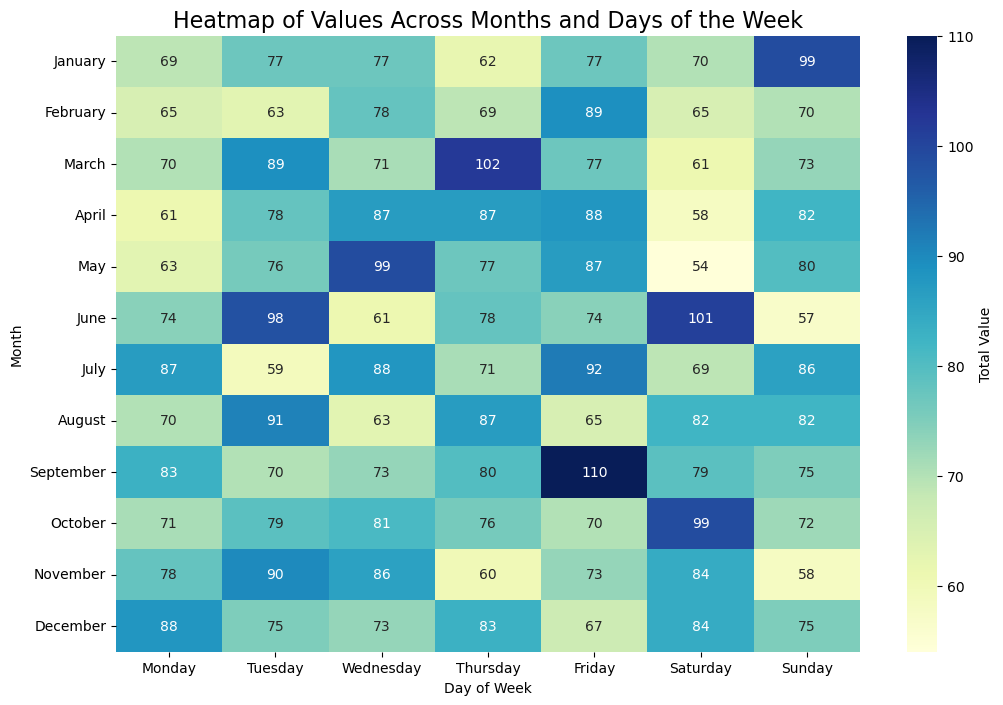

In [36]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Value'})
plt.title("Heatmap of Values Across Months and Days of the Week", fontsize=16)
plt.ylabel("Month")
plt.xlabel("Day of Week")
plt.show()

In [ ]:
data_frame["DateM"] = data_frame.index.strftime("%d")
# converts timestamp to the day part of the date
# strftime timestamp to string. 
# strptime string to timestamp - ("%Y-%m-%d %H:%M:%S") 

In [38]:

heatmap_data01 = data_frame.groupby(["month", "DateM"])["value"].sum().unstack()

In [ ]:
heatmap_data01

In [ ]:
# Plot the heatmap with dates not week days
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data01, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Value'})
plt.title("Heatmap of Values Across Months and Days of the Month", fontsize=16)
plt.ylabel("Month")
plt.xlabel("Day of Month")
plt.show()